# Loading csv file and importing libraries

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Region.csv to Region (5).csv
Saving StoreDetails.csv to StoreDetails (4).csv
Saving Weekly_Sales.csv to Weekly_Sales (4).csv
User uploaded file "Region.csv" with length 275 bytes
User uploaded file "StoreDetails.csv" with length 214115 bytes
User uploaded file "Weekly_Sales.csv" with length 149033 bytes


In [0]:
# importing libraries

import pandas as pd
import matplotlib
matplotlib.rcParams['figure.figsize'] = [30, 15]


In [0]:
# loading csv files

region_df = pd.read_csv('Region.csv')
storeDetails_df = pd.read_csv('StoreDetails.csv')
weeklySales_df = pd.read_csv('Weekly_Sales.csv')

#Working with Weekly_Sales.csv file

In [4]:
# checking samples of weekly sales data

weeklySales_df.head()

,Store,Date,Weekly_Sales
0,1,5/02/2010,24924.50
1,1,12/02/2010,46039.49
2,1,19/02/2010,41595.55
3,1,26/02/2010,19403.54
4,1,5/03/2010,21827.90


In [5]:
# insight about the weekly sales data
weeklySales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 3 columns):
Store           6435 non-null int64
Date            6435 non-null object
Weekly_Sales    6435 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 150.9+ KB


From this observation, there are total of 6,435 data entries with 3 features ie, Store, Date and Weekly_Sales. 


In [6]:
# changing datatype of Date feature from string to pandas datetime

weeklySales_df['Date'] = pd.to_datetime(weeklySales_df['Date'], dayfirst=True)
weeklySales_df.head()

,Store,Date,Weekly_Sales
0,1,2010-02-05,24924.50
1,1,2010-02-12,46039.49
2,1,2010-02-19,41595.55
3,1,2010-02-26,19403.54
4,1,2010-03-05,21827.90


In [7]:
# datatypes of features
weeklySales_df.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
dtype: object

### Preparing data to plot bar graph to check sales of each store over the period of 3 years.

In [8]:
# dropping date column from weeklySales_df dataframe and assigning sales_df1 dataframe

sales_df1 = weeklySales_df.drop(columns=['Date'])
sales_df1.head()

,Store,Weekly_Sales
0,1,24924.50
1,1,46039.49
2,1,41595.55
3,1,19403.54
4,1,21827.90


In [0]:
# taking mean(average) of weekly sales of each store

sales_df1 = sales_df1.groupby('Store').mean()

Text(0, 0.5, 'Store')

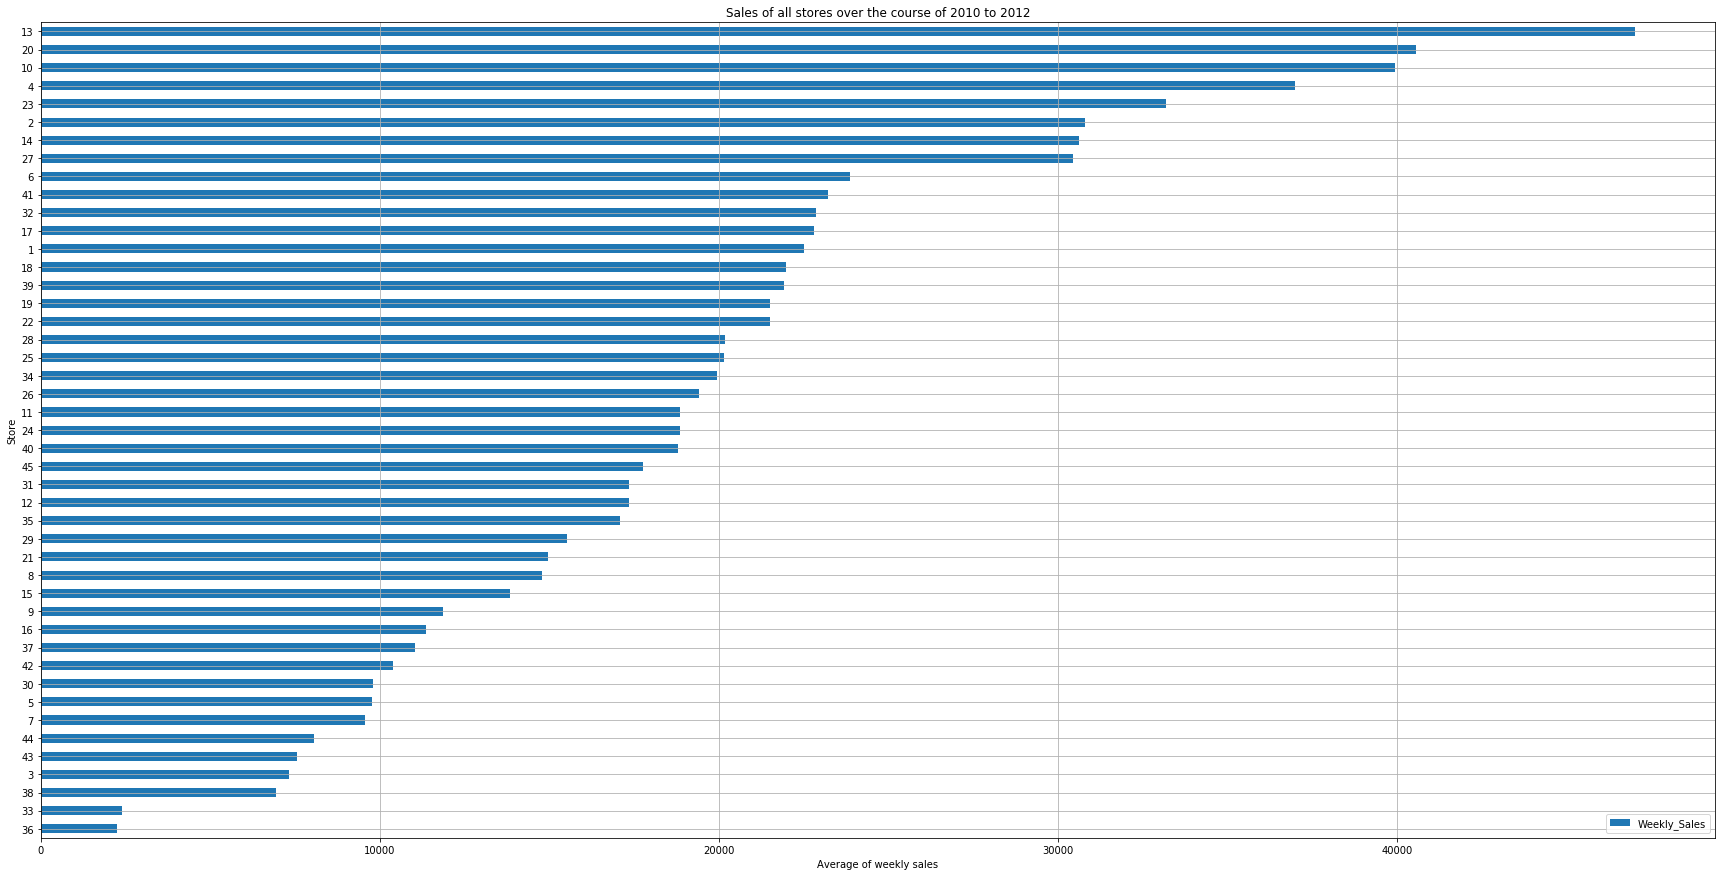

In [10]:
# bar graph plot to see sales over the period of 3 years of each store  

title='Sales of all stores over the course of 2010 to 2012'
xlabel = 'Average of weekly sales'
ylabel = 'Store'

sales_df1 = sales_df1.sort_values('Weekly_Sales')
plot = sales_df1.plot(kind='barh', y='Weekly_Sales',grid=True, title=title)

plot.set_xlabel(xlabel)
plot.set_ylabel(ylabel)

This graph shows sales of each stores over the period of 3 years. From the observation we can see store 13, 20 and 10 are top three stores to make heighest sales. Store 13 has made sale of around 48,000. Store 33 and 36 are bottom two with least sales of around 3,000.

In [11]:
sales_per_year = weeklySales_df.groupby([weeklySales_df['Store'], weeklySales_df['Date'].map(lambda x: x.year)]).mean()
sales_per_year.head()

Weekly_Sales
Store Date              
1     2010  23465.598542
      2011  22529.823077
      2012  21430.363953
2     2010  32747.878750
      2011  30129.670577

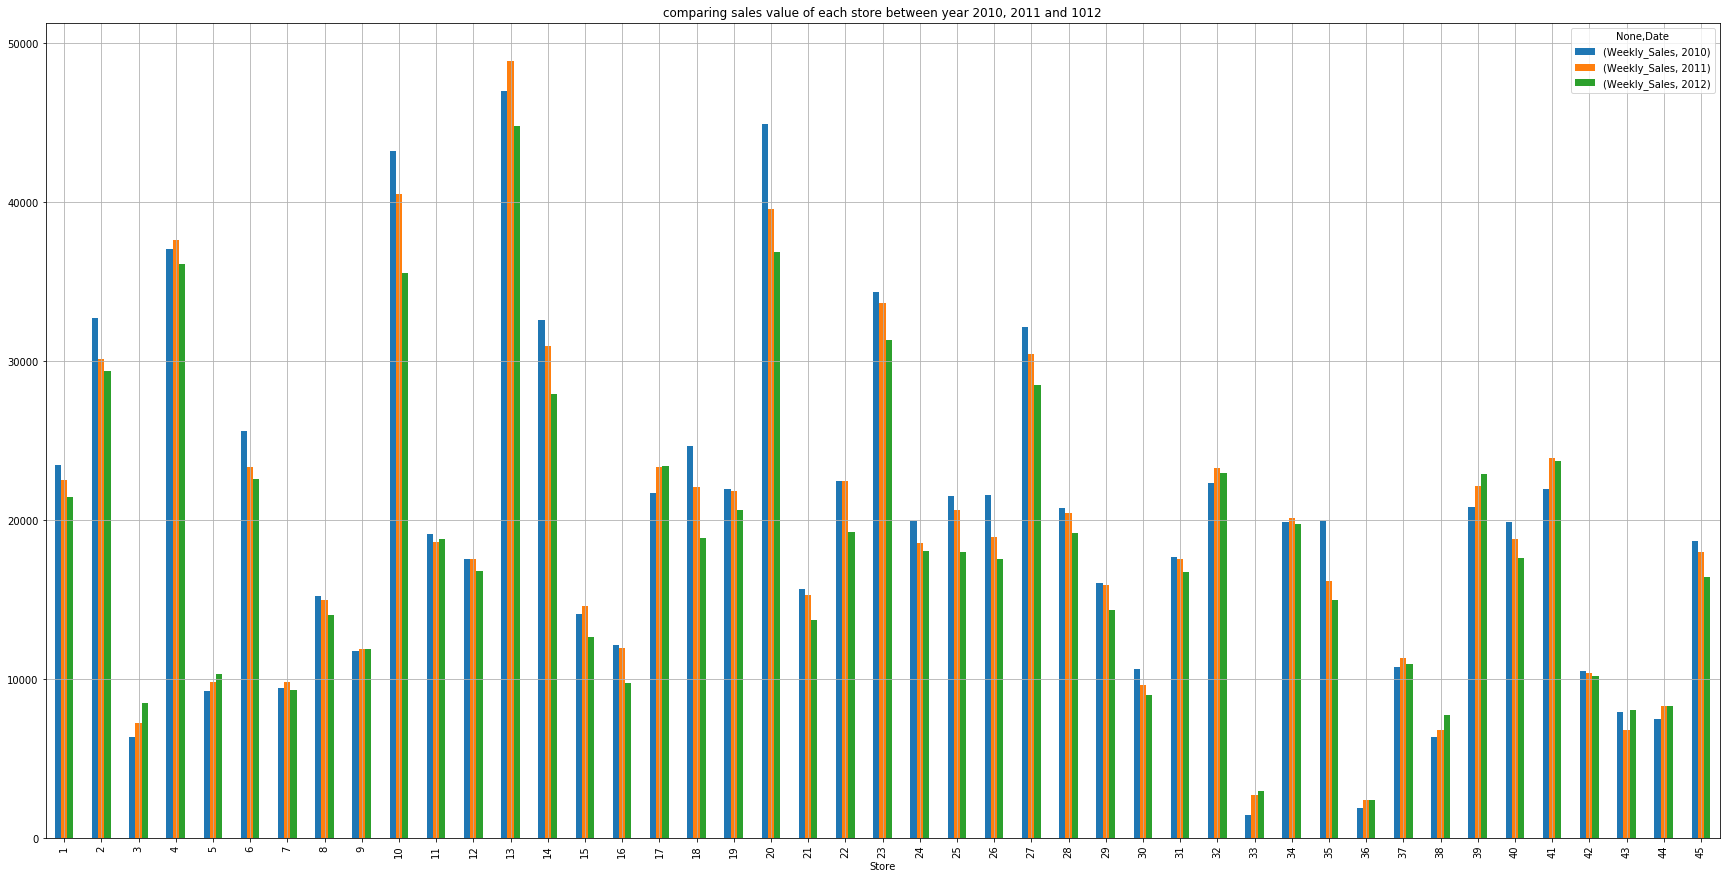

In [12]:
# bar graph plot to see sales over the period of 3 years of each store  

title='comparing sales value of each store between year 2010, 2011 and 1012'
sales_per_year.unstack().plot(kind='bar', grid=True, title=title)


As observation from this graph, there isn't any drastic behaviour in sale made by any store in any year. However we can see slightly decrease in sales value in year 2012 in most of the stores. 

### Preparing data to plot graph to check overall sale pattern from year 2010 to 2012

In [13]:
# dropping store column from weeklySales_df dataframe and assigning to sales_df2 dataframe

sales_df2 = weeklySales_df.drop(columns=['Store'])
sales_df2.head()

,Date,Weekly_Sales
0,2010-02-05,24924.50
1,2010-02-12,46039.49
2,2010-02-19,41595.55
3,2010-02-26,19403.54
4,2010-03-05,21827.90


In [0]:
# taking mean of sales value which have same date.

sales_df2 = sales_df2.groupby('Date').mean()

Text(0, 0.5, 'Weekly Sales')

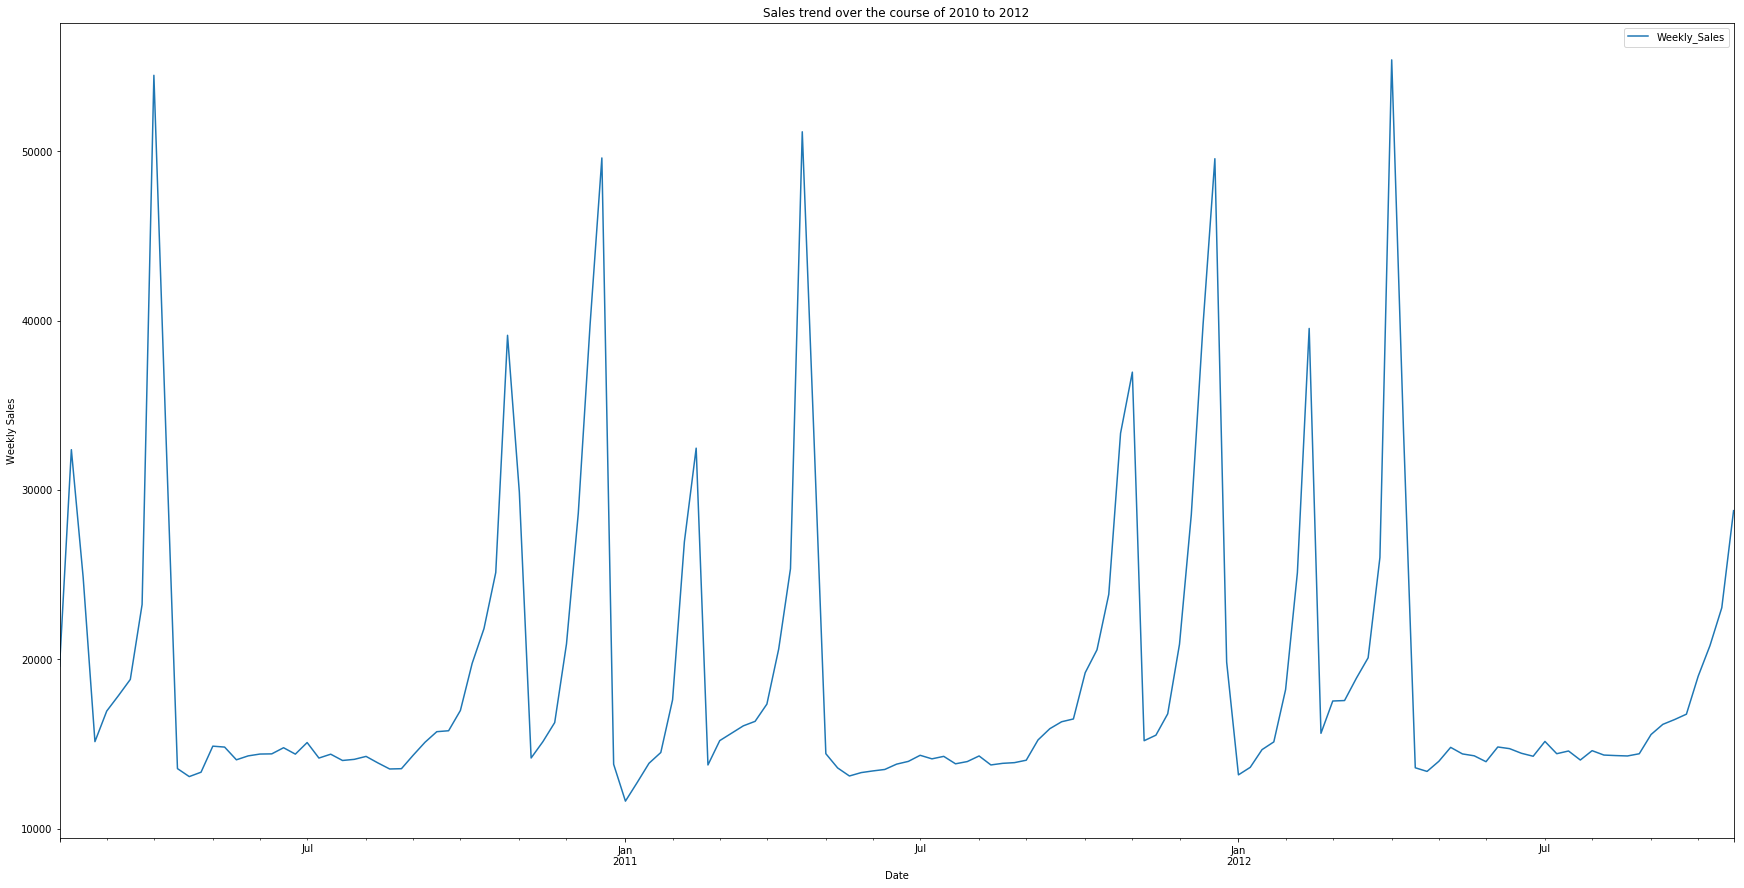

In [15]:
# bar graph plot to see 
title='Sales trend over the course of 2010 to 2012'
xlabel = 'Date'
ylabel = 'Weekly Sales'

plot = sales_df2.plot(y='Weekly_Sales', title=title)

plot.set_xlabel(xlabel)
plot.set_ylabel(ylabel)

From this graph we can see an interesting pattern in sales. Four month of the year: October, December, February and April has heighest sales rate and is seasonal. 

# Working with StoreDetails.csv file

In [16]:
# overview of Store Details data

storeDetails_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 4 columns):
Store           8190 non-null int64
Date            8190 non-null object
Temperature     8190 non-null float64
Unemployment    7605 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 256.0+ KB


There are total data entries of 8,190 with four features ie, Store, Date, Temperature and Unemployment. Feature 'Unemployment' has some missing values in its column.

In [17]:
# checking total number of missing values in 'Unemployment' column

missing = storeDetails_df['Unemployment'].isna().sum()
print("Total missing values in 'Unemployment' column : {}".format(missing))

Total missing values in 'Unemployment' column : 585


In [18]:
# converting string type 'Date' column to pandas datetime

storeDetails_df['Date'] = pd.to_datetime(storeDetails_df['Date'], dayfirst=True)
storeDetails_df.head()

,Store,Date,Temperature,Unemployment
0,1,2010-02-05,42.31,8.106
1,1,2010-02-12,38.51,8.106
2,1,2010-02-19,39.93,8.106
3,1,2010-02-26,46.63,8.106
4,1,2010-03-05,46.50,8.106


In [19]:
print('Data Type of features \n\n {}'.format(storeDetails_df.dtypes))

Data Type of features 

 Store                    int64
Date            datetime64[ns]
Temperature            float64
Unemployment           float64
dtype: object


In [0]:
# mergining( applying inner join) weekly sales data with store details data with respect to store and date column. 

merged_inner = pd.merge(left=storeDetails_df, right=weeklySales_df, left_on=['Store','Date'], right_on=['Store','Date'])

### Preparing data to plot graph against 'Temperature' and 'Weekly_Sales' features.

In [0]:
# creating new dataframe temp_sales from merged_inner dataframe using 'Temperature' and 'Weekly_Sales' features.
temp_sales = merged_inner[['Temperature', 'Weekly_Sales']].copy()

In [22]:
temp_sales_round = temp_sales
temp_sales_round['Temperature'] = round(temp_sales_round['Temperature'])
temp_sales_round.head()

,Temperature,Weekly_Sales
0,42.0,24924.50
1,39.0,46039.49
2,40.0,41595.55
3,47.0,19403.54
4,46.0,21827.90


In [0]:
temp_sales = temp_sales_round.groupby('Temperature').mean()

In [24]:
temp = temp_sales.sort_values('Weekly_Sales', ascending=False)
print('Top 10 temperature at which heighest sales occured:\n\n{}'.format(temp.head(10)))
print('\n\n\nLowest 10 temperature at which least sales occured:\n\n{}\n\n\n'.format(temp.tail(10)))

Top 10 temperature at which heighest sales occured:

             Weekly_Sales
Temperature              
25.0         35525.661250
40.0         29870.746418
31.0         29624.745333
42.0         29171.063377
37.0         28644.543377
23.0         27500.834667
48.0         26865.692347
35.0         26564.446667
45.0         26083.922841
28.0         25980.644091



Lowest 10 temperature at which least sales occured:

             Weekly_Sales
Temperature              
 95.0         9805.330000
 93.0         9758.774545
 7.0          9573.300000
-2.0          8976.040000
 99.0         7991.385000
 94.0         6970.550909
 96.0         6399.111765
 97.0         5303.275714
 98.0         1856.005000
 100.0        1829.120000





Text(0, 0.5, 'Average Weekly sales')

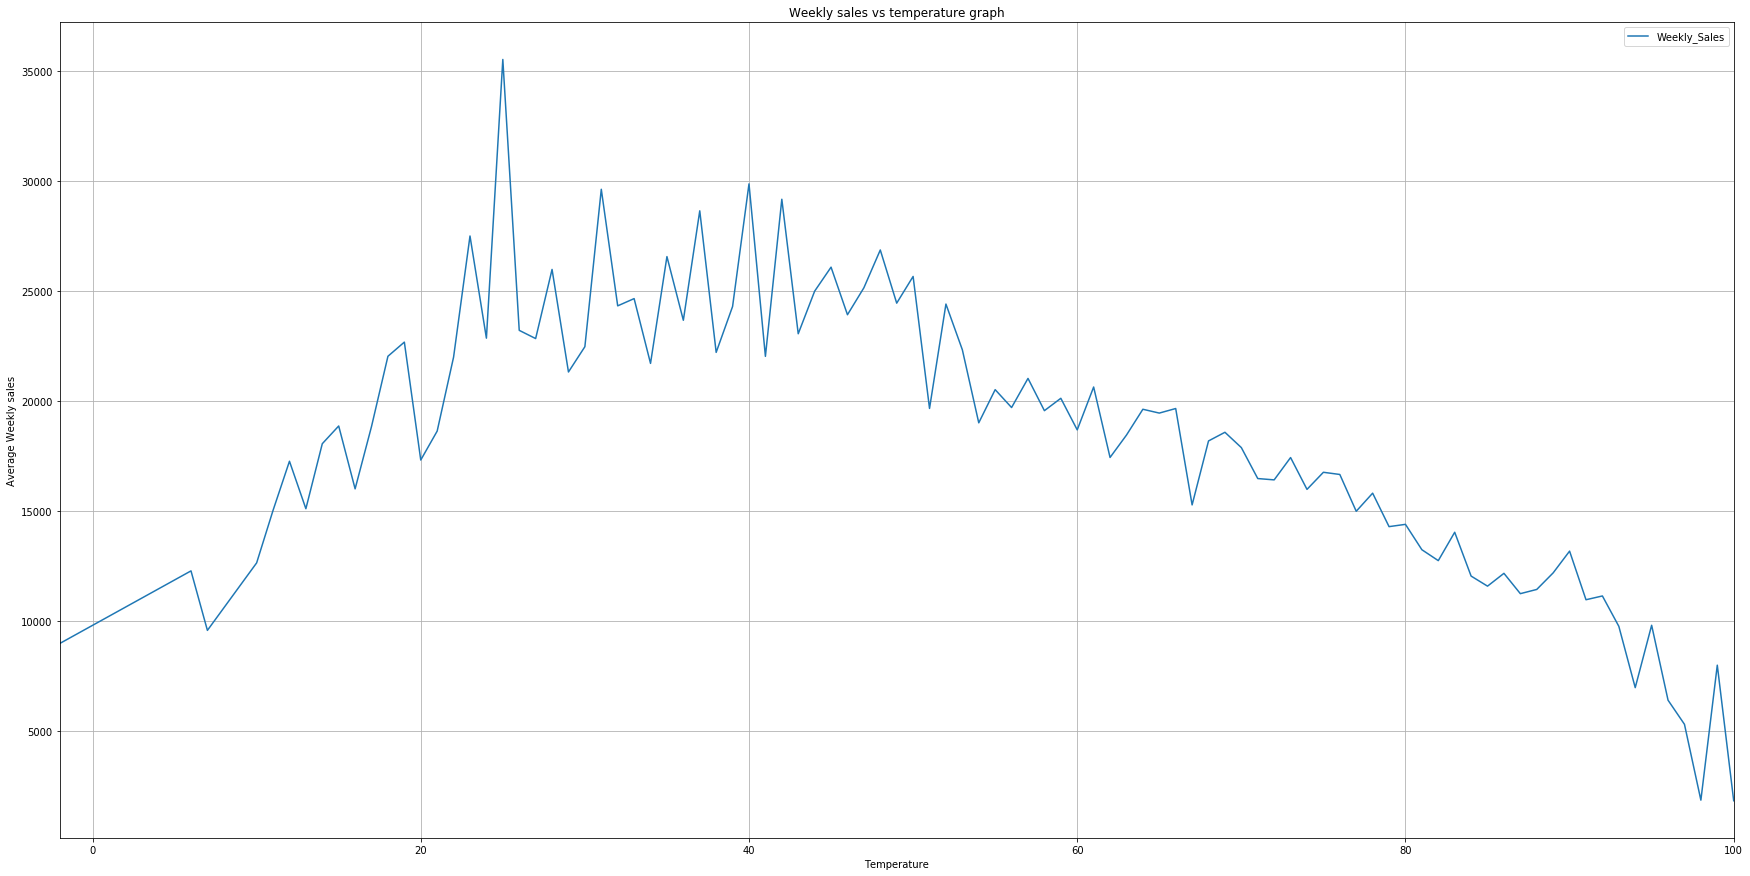

In [25]:
# plotting graph

title = 'Weekly sales vs temperature graph'
xlabel = 'Temperature'
ylabel = 'Average Weekly sales'

plot = temp_sales.plot(y='Weekly_Sales', figsize=(30, 15), grid=True, title=title)

plot.set_xlabel(xlabel)
plot.set_ylabel(ylabel)

From this graph and above list, we can conclude at temperature around 25 to 60 high pizza sale is made. Temperature higher than about 70 seem to lower sale.

### Preparing data to plot graph between Unemployment rate and Weekly Sales

In [0]:
unemp_sales = merged_inner[['Unemployment', 'Weekly_Sales']].copy()

In [0]:
# rounding off unemployment rate value to plot a clear graph
unemp_sales_round = unemp_sales
unemp_sales_round['Unemployment'] = round(unemp_sales_round['Unemployment'])

In [0]:
unemp_sales = unemp_sales_round.groupby('Unemployment').mean()

In [29]:
unemp = unemp_sales.sort_values('Weekly_Sales', ascending=False)
print('Top 3 unemployment rate at which heighest sales occured:\n\n{}'.format(unemp.head(3)))
print('\n\n\nLowest 3 unemployment rate at which least sales occured:\n\n{}\n\n\n'.format(unemp.tail(3)))

Top 3 unemployment rate at which heighest sales occured:

              Weekly_Sales
Unemployment              
4.0           29044.519437
5.0           23937.842428
7.0           20432.985412



Lowest 3 unemployment rate at which least sales occured:

              Weekly_Sales
Unemployment              
10.0          15212.391214
14.0          14136.402874
11.0          12729.341495





Text(0, 0.5, 'Average Weekly sales')

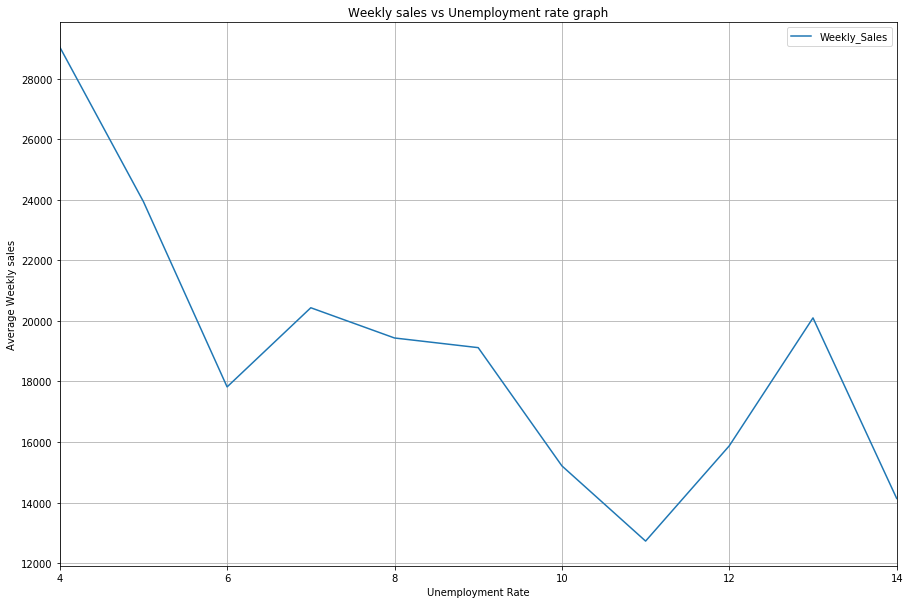

In [30]:
title = 'Weekly sales vs Unemployment rate graph'
xlabel = 'Unemployment Rate'
ylabel = 'Average Weekly sales'

plot = unemp_sales.plot(y='Weekly_Sales', figsize=(15, 10),grid=True, title=title)

plot.set_xlabel(xlabel)
plot.set_ylabel(ylabel)

From the observation we can clearly conclude that, as unemployment rate decreases sales increases. However, at around unemployment rate 13 sales seem to rise drastically. This might be the case of outlier.

#Working with region.csv file

In [31]:
region_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 2 columns):
Store     45 non-null int64
Region    45 non-null object
dtypes: int64(1), object(1)
memory usage: 800.0+ bytes


In [32]:
# merging region data with weekly sales data with respect to 'Store' feature
merged_inner_2 = pd.merge(left=weeklySales_df, right=region_df, left_on='Store', right_on='Store')
merged_inner_2.head()

,Store,Date,Weekly_Sales,Region
0,1,2010-02-05,24924.50,A
1,1,2010-02-12,46039.49,A
2,1,2010-02-19,41595.55,A
3,1,2010-02-26,19403.54,A
4,1,2010-03-05,21827.90,A


In [0]:
# taking mean of weekly_sale value with respect to region

region_trend = merged_inner_2.groupby('Region').Weekly_Sales.mean()

Text(0, 0.5, 'Region')

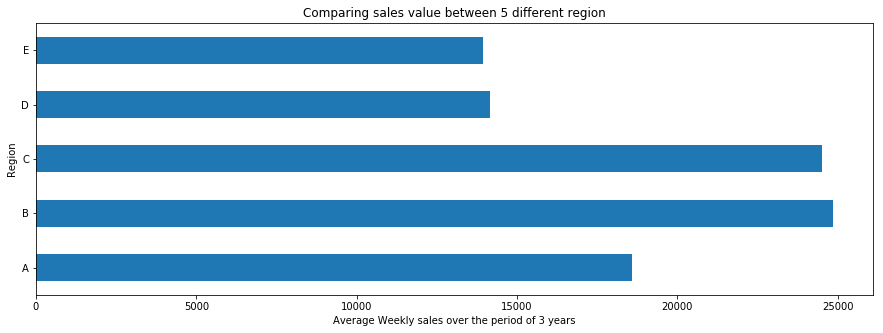

In [34]:

title = 'Comparing sales value between 5 different region'
xlabel = 'Average Weekly sales over the period of 3 years'
ylabel = 'Region'

plot = region_trend.plot(kind='barh', y='Weekly_Sales', figsize=(15, 5), title=title)

plot.set_xlabel(xlabel)
plot.set_ylabel(ylabel)
